# Assignment 1 - Convolution
## E6692 Spring 2022

## Part 2: Dilated 2D Convolution

In this part you will implement 2D **dilated convolution** (also known as "atrous convolution" and "convolution with holes". Dilated convolution is a variation of normal 2D convolution, which you are familiar with. The idea is that we take a normal 2D convolutional kernel, and expand (dilate) it to cover more area of the input by inserting spaces between the kernel elements. See the animation below to get an intuitive understanding of the difference between a normal kernel and a dilated kernel.

![Dilated Convolution GIF](https://miro.medium.com/max/1400/1*btockft7dtKyzwXqfq70_w.gif)

For further explanation see [this article](https://towardsdatascience.com/review-drn-dilated-residual-networks-image-classification-semantic-segmentation-d527e1a8fb5#:~:text=1.%20Dilated%20Convolution).

In [1]:
import torch
import numpy as np
from scipy.signal import convolve2d

from utils.convolution2D_visuals import *
from utils.convolution2D import *

%load_ext autoreload
%autoreload 2

%matplotlib inline

TODO: Implement the functions in **utils/convolution2D.py**. 

In [4]:
################################################################
################# dilate_kernel() TEST CASES ###################
################################################################

in1 = np.ones((10, 10))
out1 = dilate_kernel(in1, 1)
solution1 = in1

print("dilate_kernel() Test 1 passed: ", np.allclose(out1, solution1))

in2 = np.ones((3, 3))
out2 = dilate_kernel(in2, 2)
solution2 = np.array([[1., 0., 1., 0., 1.],
                      [0., 0., 0., 0., 0.],
                      [1., 0., 1., 0., 1.],
                      [0., 0., 0., 0., 0.],
                      [1., 0., 1., 0., 1.]])

print("dilate_kernel() Test 2 passed: ", np.allclose(out2, solution2))

in3 = np.array([[3, 8, 5, 4, 9, 4],
                [4, 3, 1, 7, 4, 5]])
out3 = dilate_kernel(in3, 3)
solution3 = np.array([[3, 0, 0, 8, 0, 0, 5, 0, 0, 4, 0, 0, 9, 0, 0, 4],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [4, 0, 0, 3, 0, 0, 1, 0, 0, 7, 0, 0, 4, 0, 0, 5]])


print("dilate_kernel() Test 3 passed: ", np.allclose(out3, solution3))

in4 = np.array([[8, -1, 3, -6],
                [3, 4, 6, -5],
                [2, -4, 8, 4],
                [0, 2, -4, 5],
                [-9, -5, 5, -3]])
out4 = dilate_kernel(in4, 2)
solution4 = np.array([[ 8.,  0., -1.,  0.,  3.,  0., -6.],
                      [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
                      [ 3.,  0.,  4.,  0.,  6.,  0., -5.],
                      [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
                      [ 2.,  0., -4.,  0.,  8.,  0.,  4.],
                      [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
                      [ 0.,  0.,  2.,  0., -4.,  0.,  5.],
                      [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
                      [-9.,  0., -5.,  0.,  5.,  0., -3.]])

print("dilate_kernel() Test 4 passed: ", np.allclose(out4, solution4))

################################################################
################ DO NOT MODIFY THE CODE ABOVE ##################
################################################################

dilate_kernel() Test 1 passed:  True
dilate_kernel() Test 2 passed:  True
dilate_kernel() Test 3 passed:  True
dilate_kernel() Test 4 passed:  True


In [ ]:
################################################################
################## calc_conv2d() TEST CASES ####################
################################################################

in1 = np.random.randint(4, size=(4, 4))
kernel1 = np.random.randint(4, size=(2, 2))
out1 = calc_conv2d(in1, kernel1)
solution1 = convolve2d(in1, kernel1, mode='valid')

print("calc_conv2d() Test 1 passed: ", np.allclose(out1, solution1))

in2 = np.random.randint(40, size=(40, 4))
kernel2 = np.random.randint(4, size=(5, 2))
out2 = calc_conv2d(in2, kernel2)
solution2 = convolve2d(in2, kernel2, mode='valid')

print("calc_conv2d() Test 2 passed: ", np.allclose(out2, solution2))

in3 = np.random.randint(400, size=(40, 400))
kernel3 = np.random.randint(10, size=(5, 20))
out3 = calc_conv2d(in3, kernel3)
solution3 = convolve2d(in3, kernel3, mode='valid')

print("calc_conv2d() Test 3 passed: ", np.allclose(out3, solution3))

in4 = np.random.randint(10, size=(10, 10))
kernel4 = np.random.randint(10, size=(3, 0))
out4 = calc_conv2d(in4, kernel4)
solution4 = convolve2d(in4, kernel4, mode='valid')

print("calc_conv2d() Test 4 passed: ", np.allclose(out4, solution4))

################################################################
################ DO NOT MODIFY THE CODE ABOVE ##################
################################################################

### Load CIFAR10 Image Dataset

In [5]:
dataset = get_cifar10()

170500096it [00:05, 32467043.72it/s]                               


#### Visualize Dataset

Note that each time the cell below is executed, a new image is displayed.

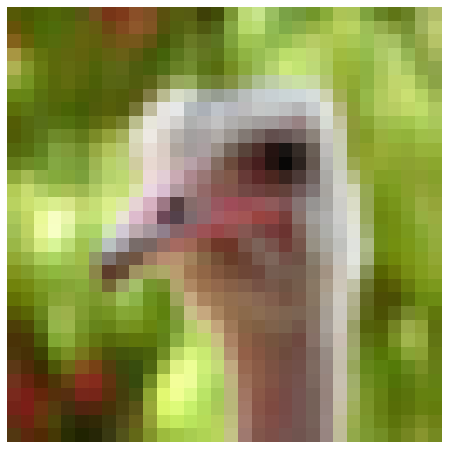

In [6]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
dataiter = iter(dataloader)
images, _ = dataiter.next()
display_image(images[0])

### Apply Dilated Convolution to Images

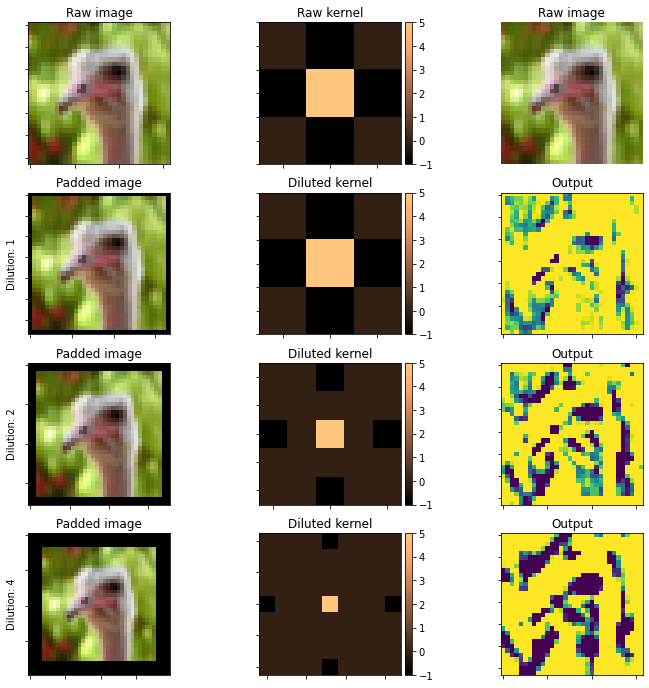

In [22]:
image = images[0].numpy().transpose(1, 2, 0)

kernel = np.array([[0, -1, 0], # the "sharpen" kernel
                   [-1, 5, -1],
                   [0, -1, 0]])

dilations = [1, 2, 4]

visualize(image, kernel, dilations)

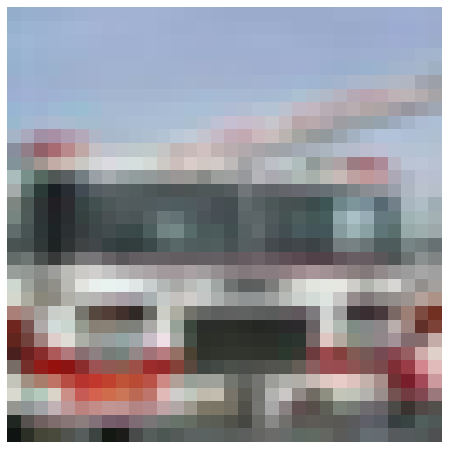

In [27]:
# TODO: experiment with different images, kernels, kernel sizes, and dilation factors.
images, _ = dataiter.next()
display_image(images[0])

[[0.05711826 0.12475775 0.05711826]
 [0.12475775 0.27249597 0.12475775]
 [0.05711826 0.12475775 0.05711826]]


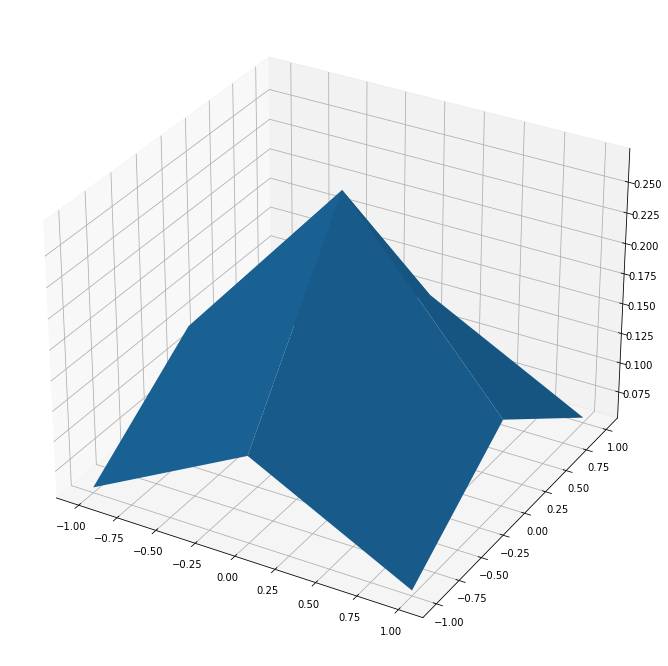

In [49]:
from mpl_toolkits.mplot3d import Axes3D
sigma = 0.8
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 1
dy = 1
x = np.arange(-1, 1.1, dx)
y = np.arange(-1, 1.1, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral
kernel_2d /= np.sum(kernel_2d)
ax.plot_surface(x2d, y2d, kernel_2d)
print(kernel_2d)

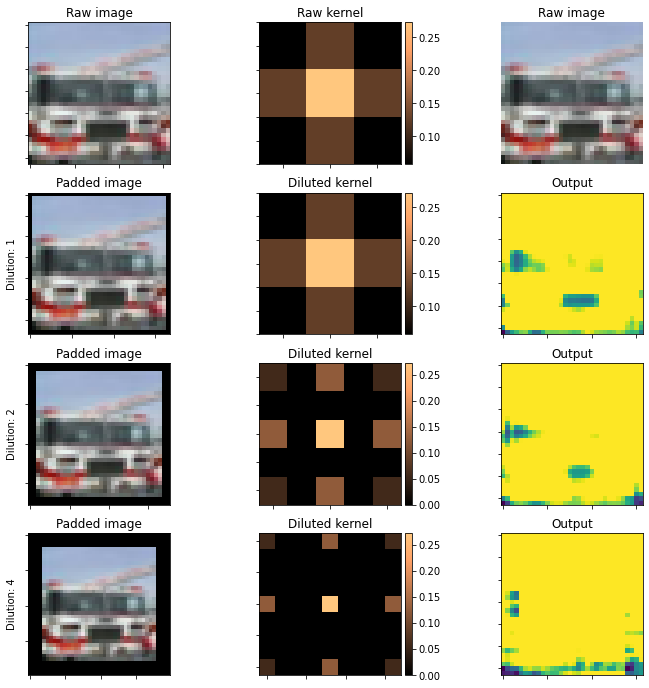

In [50]:
image = images[0].numpy().transpose(1, 2, 0)

kernel = kernel_2d # 2d gaussian kernel

dilations = [1, 2, 4]

visualize(image, kernel, dilations)

### Discussion

#### Discuss the difference between increased kernel size and increased dilation factor on the output.

TODO: your answer here

#### Did you find any parameter combinations that produce particularly interesting outputs?

TODO: your answer here
